In [148]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

train_set = pd.read_csv("train.csv")

In [149]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [150]:
train_set['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [151]:
train_set['Cabin'].value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
E101           3
              ..
D6             1
D19            1
A6             1
B101           1
C91            1
Name: Cabin, Length: 147, dtype: int64

In [152]:
train_set['Ticket'].value_counts()

1601         7
347082       7
CA. 2343     7
347088       6
3101295      6
            ..
A/5. 2151    1
A/5 21173    1
363294       1
111426       1
33638        1
Name: Ticket, Length: 681, dtype: int64

In [153]:
train_set.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [154]:
tc = train_set.corr()

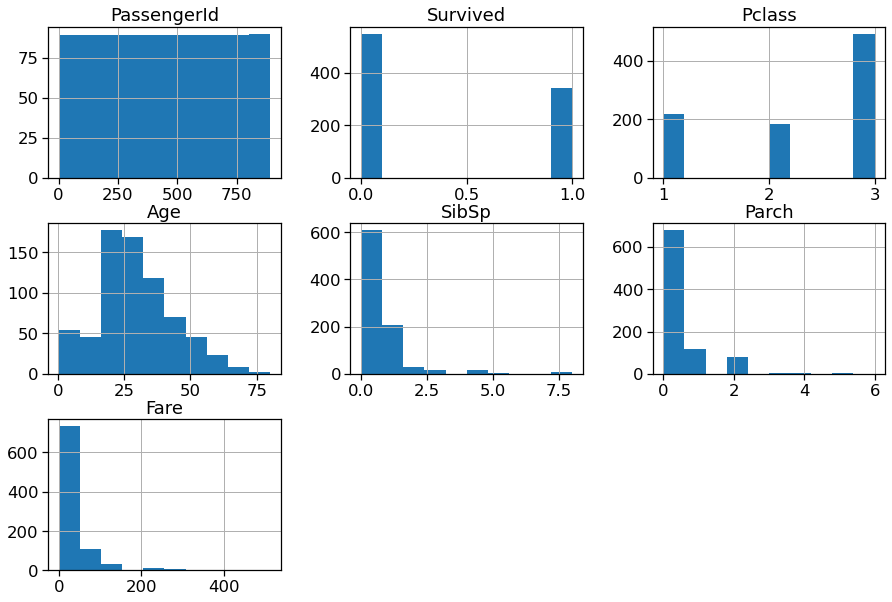

In [155]:
train_set.hist(figsize=(15,10))
plt.show()

<AxesSubplot:>

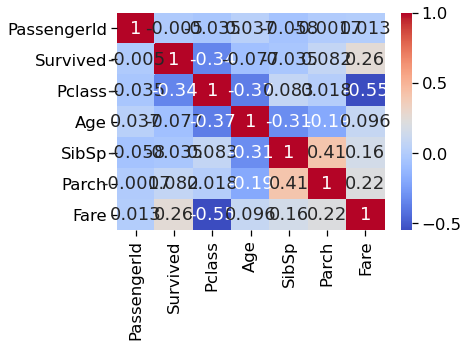

In [156]:
sns.heatmap(tc, annot=True, cmap='coolwarm')

In [157]:
tc["Survived"].sort_values(ascending=False)

Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Name: Survived, dtype: float64

<AxesSubplot:xlabel='Sex', ylabel='count'>

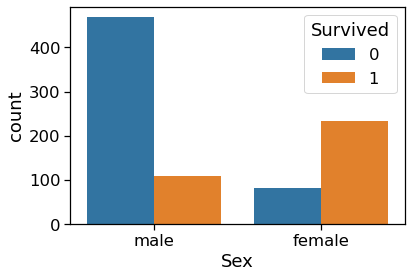

In [158]:
sns.countplot(x='Sex', data=train_set, hue='Survived')

C:\Users\Admin\AppData\Roaming\Python\Python38\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Admin\AppData\Roaming\Python\Python38\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


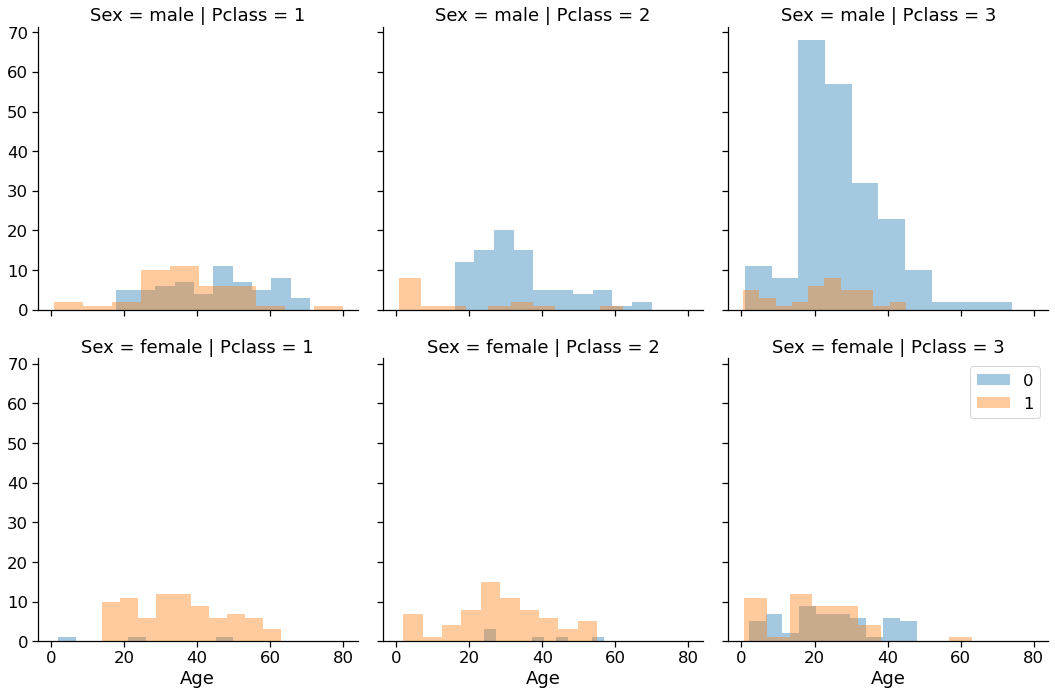

In [159]:
sns.set_context('notebook',font_scale=1.5)
grid = sns.FacetGrid(train_set, hue='Survived', row='Sex', col='Pclass', height=5)
grid.map(plt.hist, 'Age', alpha=0.4)
plt.legend()

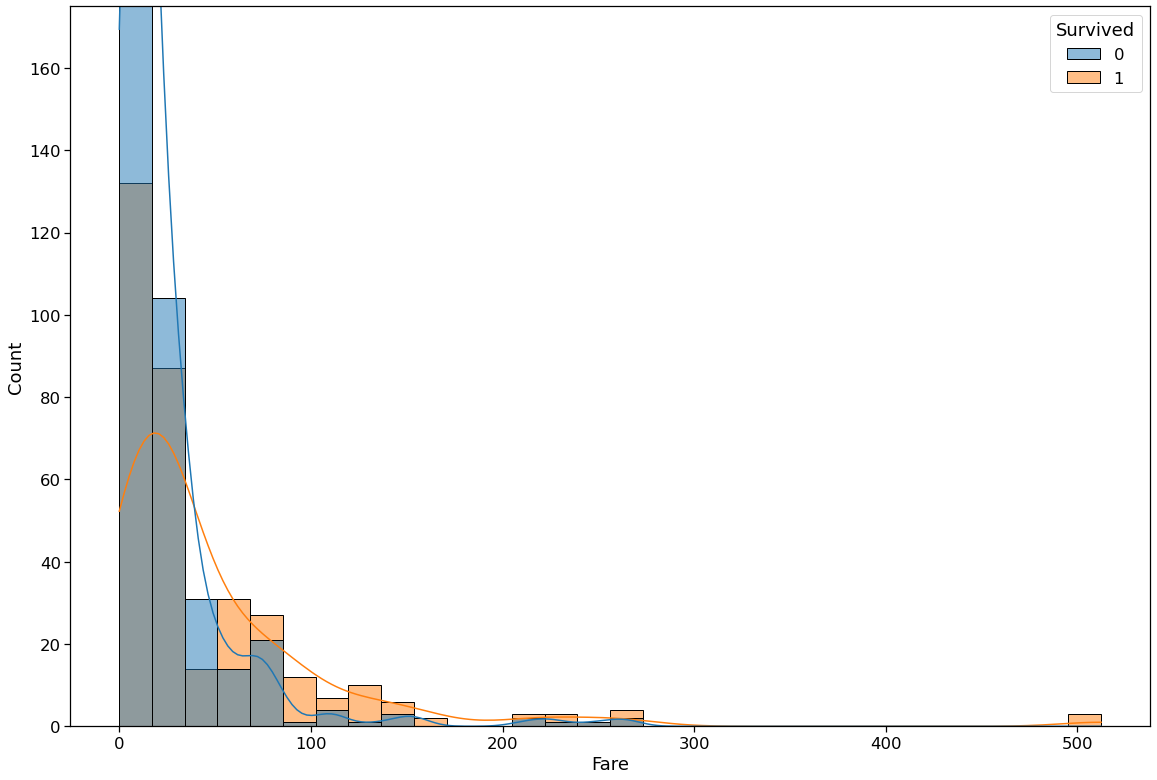

In [160]:
fig = plt.figure(figsize=(15,10))
axe = fig.add_axes([0,0,1,1], ylim=(0,175))
sns.histplot(x='Fare', data=train_set, hue='Survived', bins=30, kde=True, alpha=0.5)

<AxesSubplot:xlabel='Embarked', ylabel='count'>

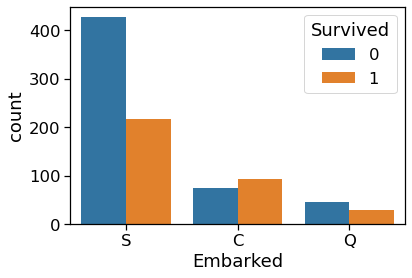

In [161]:
sns.countplot(x='Embarked', data=train_set, hue='Survived')

In [162]:
train_set.drop(['Cabin', 'Ticket', 'Name', 'PassengerId'], axis=1, inplace=True)
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [163]:
# Start cleaning data
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")

In [164]:
train_set.dropna(subset=['Embarked'], inplace=True)
num = train_set.drop(['Sex', 'Embarked', 'Survived'], axis=1)
clean_num = imputer.fit_transform(num)

In [165]:
X = pd.DataFrame(clean_num, columns=num.columns)

In [166]:
imputer.statistics_

array([ 3.    , 28.    ,  0.    ,  0.    , 14.4542])

In [167]:
sex = train_set[['Sex']]
emb = train_set[['Embarked']]

In [168]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()

In [169]:
encoded_sex = ordinal_encoder.fit_transform(sex)

In [170]:
ordinal_encoder.categories_

[array(['female', 'male'], dtype=object)]

In [171]:
encoded_sex[1:10]

array([[0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.]])

In [172]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
encoded_emb = cat_encoder.fit_transform(emb)
cat_encoder.categories_

[array(['C', 'Q', 'S'], dtype=object)]

In [173]:
encoded_emb.toarray()

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       ...,
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.]])

In [174]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

In [175]:
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('std_scaler', StandardScaler()),
])
housing_num_tr = num_pipeline.fit_transform(num)

In [176]:
full_pipeline = ColumnTransformer([
    ("sex", OrdinalEncoder(), ['Sex']),
    ("imputer", SimpleImputer(strategy="median"), ['Pclass', 'Age', 'SibSp', 'Parch']),
    ("scaler", StandardScaler(), ['Fare']),
    ("emb", OneHotEncoder(), ['Embarked']),
])

In [177]:
train_set.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [178]:
X = full_pipeline.fit_transform(train_set)
y = train_set['Survived']

In [179]:
X.shape

(889, 9)

In [180]:
# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [181]:
test_set = pd.read_csv('test.csv')
(X_test) = (full_pipeline.fit_transform(test_set))

In [201]:
X_test = X_test[~np.isnan(X_test).any(axis=1)]

In [203]:
svc = SVC()
svc.fit(X, y)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X, y) * 100, 2)
acc_svc

67.38

In [205]:
# Logistic Regression

logreg = LogisticRegression()
logreg.fit(X, y)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X, y) * 100, 2)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [206]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X, y)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X, y) * 100, 2)
acc_knn

87.4

In [207]:
gaussian = GaussianNB()
gaussian.fit(X, y)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X, y) * 100, 2)
acc_gaussian

78.74

In [208]:
linear_svc = LinearSVC()
linear_svc.fit(X, y)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X, y) * 100, 2)
acc_linear_svc

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


75.7

In [209]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X, y)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X, y) * 100, 2)
acc_decision_tree

97.98